<a href="https://colab.research.google.com/github/EarlG/Data/blob/master/Titanik_bigdata2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
# Библиотека для работы с данными
import pandas as pd

In [125]:
df = pd.read_csv('data.csv')

In [126]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
# если надо указать свои заголовки и разделитель
# data = pd.read_csv('power.csv', names = ['страна', 'год', 'количество', 'категория'], sep = '\t', header=0)
# data.head()

In [128]:
# количество строк в датафрейме

len(df)

891

In [129]:
# или так
df.shape

(891, 12)

## Основные сведения о датафрейме

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
# Статистика
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [132]:
# Список колонок
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [133]:
# Значение в колонке
df['PassengerId'].head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [134]:
## Метод value_counts позволяет получить количество строк для каждого значения
## примените его к полю survived

In [135]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [136]:
## Метод unique позволяет получить список значений (уникальных) для столбца
## примените его к Embarked

In [137]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [138]:
# Фильтрация наборов колонок
df[['Pclass', 'Survived']].head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [139]:
# Сводные таблицы
df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [140]:
## Посчитайте среднюю виживаемост ьв зависимости от пола
##

In [141]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


## Отображение данных

In [142]:
import matplotlib.pyplot as plt

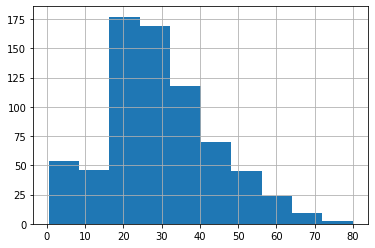

In [143]:
df['Age'].hist()

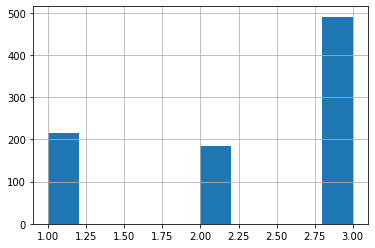

In [144]:
df['Pclass'].hist()

## Подготовим данные для машинного обучения

In [145]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удалим колоноки, которые нам кажутся мало информативными
* Имя
* Билет
* Каюта
* Информацию по родственникам

In [146]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [147]:
## Постройте датафрейм df_filtered без этих колонок (Name, SibSp, Parch, Ticket, Cabin)

In [148]:
df_filtered = df[['PassengerId','Survived', 'Pclass', 'Sex', 'Age',
       'Fare', 'Embarked']]

In [149]:
df_filtered.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [150]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


## Видим, что есть пустые значения, попробуем с ними разобраться

In [151]:
df_filtered['Age'].isna().head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [152]:
df_filtered[df_filtered['Age'].isna()].head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
5,6,0,3,male,NaN,8.4583,Q
17,18,1,2,male,NaN,13.0000,S
19,20,1,3,female,NaN,7.2250,C
26,27,0,3,male,NaN,7.2250,C
28,29,1,3,female,NaN,7.8792,Q


## Посчитаем средний возраст и заменим им пропущенные значения

In [153]:
df_filtered['Age'].mean()

29.69911764705882

In [154]:
df_filtered['Age_rep'] = df_filtered['Age'].fillna(29.69)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   Age_rep      891 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


## Аналогично заменим неизвестный пункт назначения на самый вероятный

In [156]:
## Практика

In [157]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [158]:
df_filtered['Embarked_rep'] = df_filtered['Embarked'].fillna('S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    object 
 4   Age           714 non-null    float64
 5   Fare          891 non-null    float64
 6   Embarked      889 non-null    object 
 7   Age_rep       891 non-null    float64
 8   Embarked_rep  891 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 62.8+ KB


## Разберемся с полом. Добавим столбец is_male

In [160]:
df_filtered['Sex'] == 'male'

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

In [161]:
df_filtered['is_male'] = df_filtered['Sex'] == 'male'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
df_filtered.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Age_rep,Embarked_rep,is_male
0,1,0,3,male,22.0,7.2500,S,22.0,S,True
1,2,1,1,female,38.0,71.2833,C,38.0,C,False
2,3,1,3,female,26.0,7.9250,S,26.0,S,False
3,4,1,1,female,35.0,53.1000,S,35.0,S,False
4,5,0,3,male,35.0,8.0500,S,35.0,S,True


## Профильтруем

In [163]:
df_filtered.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Age_rep', 'Embarked_rep', 'is_male'],
      dtype='object')

In [164]:
df_filtered = df_filtered[['PassengerId', 'Survived', 'Pclass', 'Fare', 'Age_rep', 'Embarked_rep', 'is_male']]

In [165]:
df_filtered.head()

,PassengerId,Survived,Pclass,Fare,Age_rep,Embarked_rep,is_male
0,1,0,3,7.2500,22.0,S,True
1,2,1,1,71.2833,38.0,C,False
2,3,1,3,7.9250,26.0,S,False
3,4,1,1,53.1000,35.0,S,False
4,5,0,3,8.0500,35.0,S,True


## Осталось заменить Embarked_rep на цифры. Используем принцип one_hot

In [166]:
df_filtered = pd.get_dummies(df_filtered, ['Embarked_rep'])

In [167]:
df_filtered.head()

,PassengerId,Survived,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
0,1,0,3,7.2500,22.0,True,0,0,1
1,2,1,1,71.2833,38.0,False,1,0,0
2,3,1,3,7.9250,26.0,False,0,0,1
3,4,1,1,53.1000,35.0,False,0,0,1
4,5,0,3,8.0500,35.0,True,0,0,1


# Переходим к машинному обучению :-)

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [169]:
df_filtered.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Fare', 'Age_rep', 'is_male',
       'Embarked_rep_C', 'Embarked_rep_Q', 'Embarked_rep_S'],
      dtype='object')

In [170]:
# Формируем признаки и целевую переменную
X, y = df_filtered[['PassengerId', 'Pclass', 'Fare', 'Age_rep', 'is_male', 'Embarked_rep_C', 'Embarked_rep_Q', 'Embarked_rep_S']], df_filtered['Survived']

In [171]:
# Разделяем данные на данные для обучения и проверки

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [173]:
X_train.head()

,PassengerId,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
866,867,2,13.8583,27.00,False,1,0,0
362,363,3,14.4542,45.00,False,1,0,0
405,406,2,21.0000,34.00,True,0,0,1
668,669,3,8.0500,43.00,True,0,0,1
552,553,3,7.8292,29.69,True,0,1,0


In [174]:
y_train.head()

866    1
362    0
405    0
668    0
552    0
Name: Survived, dtype: int64

In [175]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
X_train

array([[ 1.67900112, -0.38174929, -0.35248057, ...,  2.09617256,
        -0.31696006, -1.61685287],
       [-0.29012138,  0.82627513, -0.3403559 , ...,  2.09617256,
        -0.31696006, -1.61685287],
       [-0.12212085, -0.38174929, -0.20716966, ..., -0.47705996,
        -0.31696006,  0.61848547],
       ...,
       [-0.13384181,  0.82627513, -0.43454541, ..., -0.47705996,
        -0.31696006,  0.61848547],
       [-1.41142724,  0.82627513, -0.47879975, ..., -0.47705996,
        -0.31696006,  0.61848547],
       [-0.8175649 ,  0.82627513, -0.48693848, ..., -0.47705996,
        -0.31696006,  0.61848547]])

In [177]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [178]:
X_train.head()

,PassengerId,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
0,1.679001,-0.381749,-0.352481,-0.227429,-1.372075,2.096173,-0.316960,-1.616853
1,-0.290121,0.826275,-0.340356,1.187882,-1.372075,2.096173,-0.316960,-1.616853
2,-0.122121,-0.381749,-0.207170,0.322969,0.728823,-0.477060,-0.316960,0.618485
3,0.905417,0.826275,-0.470661,1.030625,0.728823,-0.477060,-0.316960,0.618485
4,0.452207,0.826275,-0.475154,-0.015919,0.728823,-0.477060,3.154972,-1.616853


## Обучаем наши модели

In [179]:
logistic = LogisticRegression()


In [180]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [182]:
## Обучите модель SVC


## Оценим качество

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [184]:
accuracy_score(y_test, logistic.predict(X_test))

0.8100558659217877

In [185]:
precision_score(y_test, logistic.predict(X_test))

0.75

In [186]:
recall_score(y_test, logistic.predict(X_test))

0.7916666666666666

In [187]:
f1_score(y_test, logistic.predict(X_test))

0.7702702702702704

In [188]:
accuracy_score(y_test, tree.predict(X_test))

0.8044692737430168

In [189]:
precision_score(y_test, tree.predict(X_test))

0.7605633802816901

In [190]:
recall_score(y_test, tree.predict(X_test))

0.75

In [191]:
f1_score(y_test, tree.predict(X_test))

0.7552447552447553

In [192]:
## Посчитайте метрики для SVC